# Load required libraries

In [1]:
from dtw import dtw
import librosa
import librosa.display
from scipy.spatial.distance import cdist

# Load 2 sample audio data to memory

In [15]:
y1, sr1 = librosa.load('train/fcmc0-a1-t.wav')
y2, sr2 = librosa.load('train/fcmc0-b1-t.wav')

# CALCULATE MFCC features and plot on graph

Populating the interactive namespace from numpy and matplotlib


/Users/psbots/anaconda/envs/py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


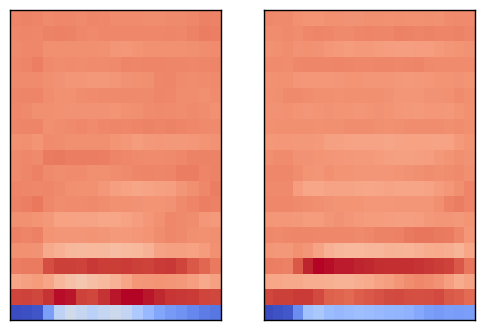

In [16]:
%pylab inline
subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

In [17]:
#calculate the DTW between the 2 sample audios 'a' and 'b'
dist, cost, path, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print 'Normalized distance between the two sounds:', dist   

Normalized distance between the two sounds: 141.287107964


# Main Program

In [5]:
import os
dirname = "train"
files = [f for f in os.listdir(dirname) if not f.startswith('.')]

The following code Iterates through the Training folder and builds the trained representation in the Distance matrix

In [6]:
minval = 200
distances = ones((len(files), len(files)))
y = ones(len(files))
for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    for j in range(len(files)):
        y2, sr2 = librosa.load(dirname+"/"+files[j])
        mfcc2 = librosa.feature.mfcc(y2, sr2)
        dist, _, _, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
#         print files[i],mfcc1.T[0][0],mfcc2.T[0][0],files[j],dist
#         if dist<minval:
#             minval = dist
        distances[i,j] = dist
    if i%2==0:
        y[i] = 0
    else:
        y[i] = 1
# print distances,y

In [7]:
#a = 155.156
#b = 184.702
#c = 158.231
label = ['a','b']

# Train a kNN classifier to determine if the audio is 'a' or 'b'

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(distances, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Test a sample from the test folder

In [12]:
y, sr = librosa.load('test/farw0-b1-t.wav')
mfcc = librosa.feature.mfcc(y1, sr1)
distanceTest = []
for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    dist, _, _, _ = dtw(mfcc.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
    distanceTest.append(dist)

In [10]:
label[int(classifier.predict(distanceTest)[0])]

/Users/psbots/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'b'